### Groupe 4 Master 1 IFRI 2025-2026 THEME A PRIORI
### Membres du groupe
### MUSAWAR Amatul (GL); AKAKPO Josephine Jolinda (SI); VODOUNOU Amaral Friold (SI); GANDONOU M Bénoît Romario (SIRI); HOUNGBEDJI Carlos
### Implémentation de l'algorithme à priori

# Description du dataset
Les données que nous utilisons sont les données d'achat dans un supermaché d'alimentation.
Dans ce dataset nous avons trois Member_number (l'Id du client); Date (la date de l'achat); et itemdescription (Le produit acheté).

Le dataset contient 38765 ligne de produits achetés.

Voici les produits achetés dans le supermaché
Instant food products
UHT-milk; abrasive cleaner; artif. sweetener; baby cosmetics; bags; baking powder; bathroom cleaner; beef; berries; beverages; bottled beer; bottled water; brandy; brown bread; butter; butter milk; cake bar; candles; candy; canned beer; canned fish; canned fruit; canned vegetables ; cat food ;cereals ;chewing gum; chicken; chocolate; chocolate marshmallow; citrus fruit; cleaner; cling film/bags; cocoa drinks; coffee; condensed milk; cooking chocolate; cookware; cream; cream cheese; curd; curd cheese; decalcifier; dental care; dessert; detergent; dish cleaner; dishes; dog food; domestic eggs; female; sanitary products; finished products; fish; flour; flower (seeds); flower soil/fertilizer; frankfurter; frozen chicken; frozen dessert; frozen fish; frozen fruits; frozen meals; frozen potato products; frozen vegetables; fruit/vegetable juice; grapes; hair spray; ham; hamburger meat; hard cheese;herbs; honey: house keeping products; hygiene articles; ice cream; instant coffee; jam; ketchup; kitchen towels; kitchen utensil; light bulbs; liqueur; liquor; liquor (appetizer); liver loaf; long life bakery product; make up remover; male cosmetics; margarine; mayonnaise;meat
meat spreads; misc. beverages; mustard; napkins; newspapers; nut snack; nuts/prunes; oil; onions; organic products; organic sausage; other vegetables; packaged fruit/vegetables; pasta; pastry; pet care; photo/film; pickled vegetables; pip fruit; popcorn; pork; pot plants; potato products; preservation products; processed cheese; prosecco; pudding powder; ready soups; red/blush wine; rice; roll products; rolls/buns; root vegetables; rubbing alcohol; rum; salad dressing; salt; salty snack; sauces; sausage; seasonal products; semi-finished bread; shopping bags; skin care; sliced cheese; snack products; soap; soda; soft cheese; softener; soups; sparkling wine; specialty bar; specialty cheese; specialty chocolate; specialty fat; specialty vegetables; spices; spread cheese; sugar; sweet spreads; syrup; tea; tidbits; toilet cleaner; tropical fruit; turkey; vinegar; waffles; whipped/sour cream; whisky; white bread; white wine; whole milk; yogurt; zwieback

Le lien du dataset https://media.geeksforgeeks.org/wp-content/uploads/20250523115118865988/Groceries_dataset.csv

# Importation des librairies nécessaires

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Chargement du dataset

In [2]:
import pandas as pd
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Description des colonnes du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


## Les produits les plus fréquents

itemDescription
whole milk          0.064543
other vegetables    0.048962
rolls/buns          0.044267
soda                0.039056
yogurt              0.034412
root vegetables     0.027628
tropical fruit      0.026622
bottled water       0.024068
sausage             0.023836
citrus fruit        0.020947
Name: proportion, dtype: float64


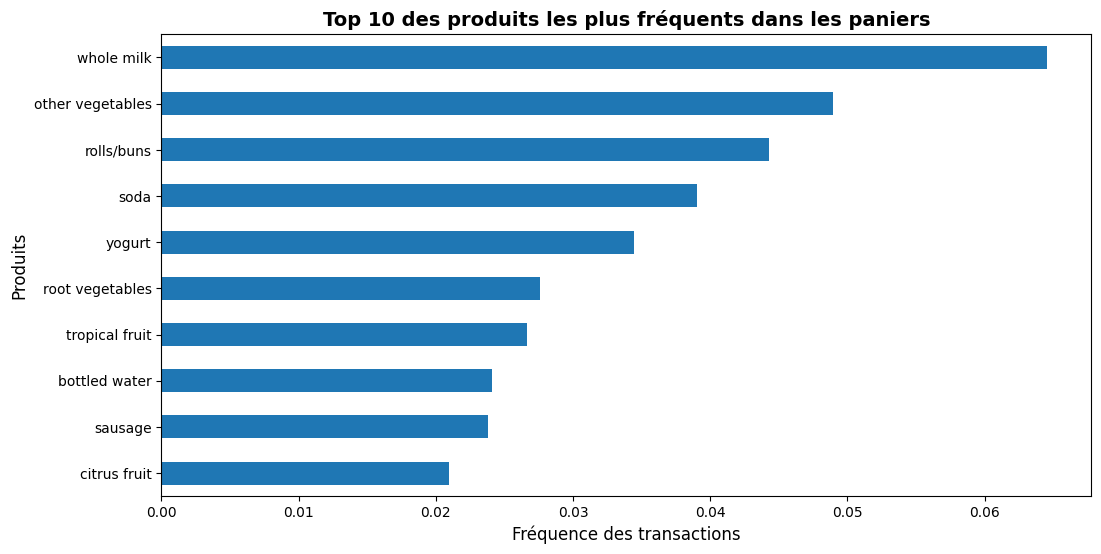

In [5]:
from matplotlib import pyplot as plt
product_freq = df["itemDescription"].value_counts(normalize=True)
product_freq = product_freq[:10]
print(product_freq)
plt.figure(figsize=(12, 6))
product_freq.plot(kind='barh')
plt.title('Top 10 des produits les plus fréquents dans les paniers', 
          fontsize=14, fontweight='bold')
plt.xlabel('Fréquence des transactions', fontsize=12)
plt.ylabel('Produits', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# Prétraitement

## Voir les données manquantes

In [6]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

## Nous allons regrouper les chaque ligne par client et par date pour former un payement par panier
## Avoir ces transaction sous forme d'une liste

In [7]:
df["itemDescription"] = df["itemDescription"].str.strip()
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
#basket
#transactions

## Convertir sous le format de ONE-HOT
## A priori a besoin des données sous forme de vrai ou faux, si un produit est dans un achat ou pas

In [8]:
# Nous allons utiliser le prétraitement d'apriori disponsible dans la librairie mlxtend
# Cet encoder s'appelle transaction encoder

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Mise en place du modèle

In [9]:
# Nous allons mettre en place le modèle pour trouver les combinaisons de produits fréquents dans les achats
# Nous allons utiliser min_support 0.01, ce qui signifie que nous aurons les combinaisons présentes dans au moins 1% des achats

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

#Nous allons afficher le nombre de combinaisons de produits fréquents dans au moins 1% des achats
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])
frequent_itemsets

Total Frequent Itemsets: 69


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(soda, whole milk)"


# Evaluation et présentation des résultats

In [10]:
# Nous allons générer les règles d'associations
# Support: quelle est la fréquence d'apparition de la combinaison dans l"ensemble du dataset.
# Confidence: La probabilité d'acheter un objet B si un objet A est payé.
# Lift: une mesure de la règle. (>1 signifie que c'est une bonne règle)

#Nous allons utilisé le metric confidence avec une confidence supérieure ou égale à 0.1

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

#Nous allons afficher les règles dont un antécédent et un conséquent existent
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
#print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


# Interprétation des résultats

Nous avons quatre règles dont la confidence et  le lift sont faibles ce qui veut dire que les quatres règles que nous avons ne sont pas de bonnes règles, ça pourrait être une coïncidence pour chacune de ces quatre règles

## Test avec un support plus bas min_support = 0.05

In [12]:
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
#Nous allons afficher le nombre de combinaisons de produits fréquents dans au moins 1% des achats
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])
frequent_itemsets

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

#Nous allons afficher les règles dont un antécédent et un conséquent existent
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
#print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Total Frequent Itemsets: 126


,antecedents,consequents,support,confidence,lift
0,(bottled beer),(whole milk),0.007151,0.157817,0.999330
1,(bottled water),(whole milk),0.007151,0.117841,0.746196
2,(canned beer),(whole milk),0.006015,0.128205,0.811821
3,(citrus fruit),(whole milk),0.007151,0.134591,0.852259
4,(domestic eggs),(whole milk),0.005280,0.142342,0.901341
5,(frankfurter),(other vegetables),0.005146,0.136283,1.116150
6,(frankfurter),(whole milk),0.005280,0.139823,0.885388
7,(newspapers),(whole milk),0.005614,0.144330,0.913926
8,(other vegetables),(whole milk),0.014837,0.121511,0.769430
9,(pastry),(whole milk),0.006483,0.125323,0.793571


## Interprétation
Nous avons 18 règles, aucune de ces règles n'est forte, les lifts sont proches de 1 ce qui signifie que voir les produits définissant ces règles ensemble est du hasard